## Imports

In [0]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

## Dataset

In [2]:
# Importing the dataset
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(5000, 2)


,V1,V2
0,4.53320,6.06542
1,5.20651,5.94591
2,5.16664,6.60290
3,5.70023,5.70741
4,5.24035,5.18443


V1
V2


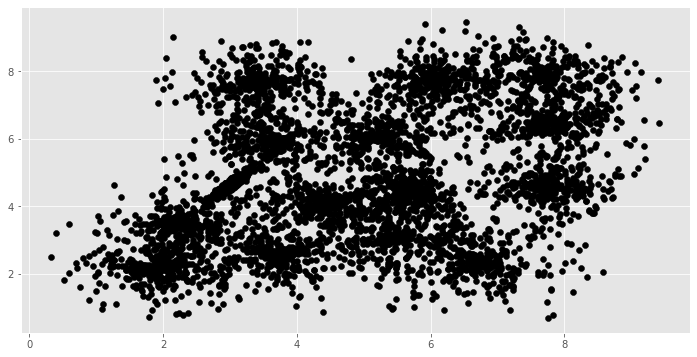

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values

for key in data.keys():
    print(key)
X = np.array(list(zip(f1, f2))) # X = our dataset
plt.scatter(f1, f2, c='black')

## Distance Function (Eculidean)

In [0]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

## Initializing Centroids

In [5]:
# Number of clusters
k = 6
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X[:,0]) - 2.0, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X[:,1]) - 2.0, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[1. 2.]
 [1. 6.]
 [6. 2.]
 [0. 5.]
 [4. 5.]
 [4. 4.]]


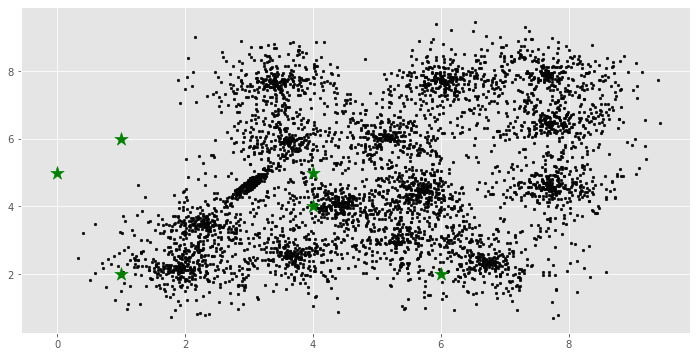

In [6]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

## K-Means Algorithm

In [0]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error >= 0.000000001:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

[[2.5648384 2.596494 ]
 [4.0403104 6.8827324]
 [7.223857  3.4504843]
 [3.1608415 4.7369366]
 [7.1841264 7.309391 ]
 [5.202948  3.8847754]]


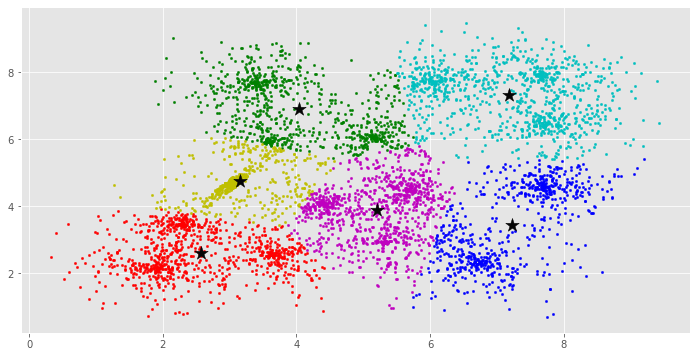

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
print(C)

## The scikit-learn approach

[[5.89459071 3.22492051]
 [7.09566551 7.46898989]
 [3.64545176 4.5255889 ]
 [4.04251013 6.8122766 ]
 [2.54935821 2.61358221]
 [7.69756283 4.86447572]]


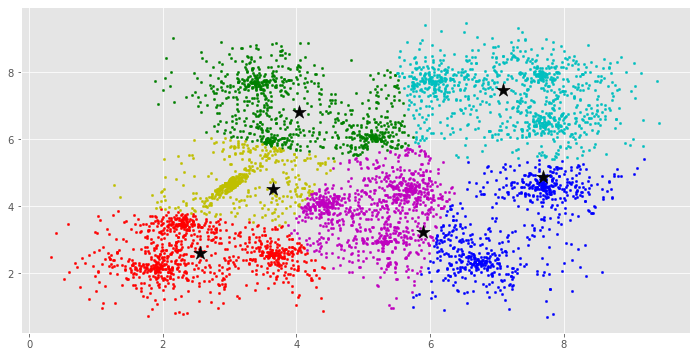

In [9]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print(centroids) # From sci-kit learn
for i in range(k):
  points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
  plt.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')